<a href="https://colab.research.google.com/github/Apondi-Otieno/GDL/blob/main/GDL_July_Projects_week_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internal GDL project

## *1. How do different unsupervised anomaly detectors perform across different datasets?*
Limit research to unsupervised anomaly detectors, on the following ADbench datasets:
* annthyroid,
* campaign,
* census,
* donors, and
* skin

Evaluate performance of AD methods using AUC-ROC. Keep in mind different methods have different hyperparameters. Optimizing hyperparameters requires cross-validation.

### Hints

*You may want to subsample datasets to reduce computational load---make sure to stratify on y to preserve class balance of inliers/outliers.*

*While you can run each dataset as a single experiment, it may be more efficient to build a pipeline.*

## *2. How consistent are SHAP explanations for different anomaly detectors?*
Where anomaly detectors agree on predictions, do they give rise to similar SHAP value explanations? How about when they disagree?

## *3. How does missing data impact anomaly detection?*
Are different anomaly detection algorithms better suited for datasets where there are more missing values?

# Project Answers

Written & Researched by Apondi Otieno for Week 1 July Project for the GDL.





## Project Pipeline

I worked with the following pipeline to complete the project:

1. Set Up the Environment
2. Build the Pipeline
3. Define the Unsupervised Anomaly
4. Detection Methods
5. Run Evaluations and Pool Results
6. Apply SHAP for Explainability
7. Analyze Sensitivity to Missingness
8. Compare SHAP Explanations
9. Add conclusions.



# Question 1

## Step 1:Load and explore the datasets.

In [ ]:
# load the datasets.
adbench_dir = '/usr/local/lib/python3.10/dist-packages/adbench/datasets/Classical/'
dataset_names = ['2_annthyroid.npz', '5_campaign.npz', '9_census.npz', '11_donors.npz', '33_skin.npz']
datasets = [np.load(adbench_dir+dataset_name, allow_pickle=True) for dataset_name in dataset_names]
# iterate over datasets
loaded_datasets = []
for data in datasets:
    X, y = data['X'], data['y']
    loaded_datasets.append((X, y))
# update datasets
datasets=loaded_datasets

KeyboardInterrupt: 

In [ ]:
# checking if the file path leads to the right place because of the filenotfounderror

import os
print(os.listdir(adbench_dir))


In [ ]:

# splitting the training and testing data sets in all 5 data sets

from sklearn.model_selection import train_test_split

for i, data in enumerate(datasets):
  # i is for index of the datasets in the dictionary(dataset_names)
  # enumerate is a python function used to iterate over an iterable object
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print(f"Dataset: {dataset_names[i]}")
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")



In [ ]:
# visualize the training data distribution.
for i in range(len(datasets)):
  sns.pairplot(pd.DataFrame(X_train), diag_kind='kde')
  plt.title(f"Pairplot for {dataset_names[i]}")
  plt.show()

## Step 2:Performance of Unsupervised Anomaly Detectors

In this section i intend to demonstrate the performance of AD methods using AUC-ROC and show overall performance

1. Annthyroid
2. Campaign
3. Census
4. Donors
5. Skin





In [ ]:
#how do i show overall performance of the AD methods in one pool?

results = {}  # Initialize a dictionary to store results
for i, data in enumerate(datasets):
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print(f"Dataset: {dataset_names[i]}")
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
    # ... (your existing code for model training and evaluation)
    # apply pyOD to detect anomalies.

    # Initialize a PyOD model (KNN as an example)
    clf = KNN()

    # Train the model
    clf.fit(X_train)

    # Predict anomalies on the test set
    y_test_pred = clf.predict(X_test)
    y_test_scores = clf.decision_function(X_test)

    # Evaluate performance of AD methods using AUC-ROC

    from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)
    auc = roc_auc_score(y_test, y_test_scores)
    accuracy = accuracy_score(y_test, y_test_pred)

    print(f"ROC AUC for dataset {dataset_names[i]}: {auc:.4f}")
    print(f"Accuracy for dataset {dataset_names[i]}: {accuracy:.4f}")
    print("------")  # Add a separator between datasets

    # Store the results
    results[dataset_names[i]] = {'auc': auc, 'accuracy': accuracy}


    #to do:subset the datasets

    # visualize the ROC curve


      # Plot ROC curve
    import matplotlib.pyplot as plt

    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {dataset_names[i]}')
    plt.legend(loc='best')
    plt.show()



## Step 3: Visualize anomaly scores

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_test_scores, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title(f'Anomaly Scores Distribution for {dataset_names[i]}')
plt.show()

In [ ]:
#find out how to apply this code to the looped datasets that i have

# Visualize the data distribution (use a subset if too large), coloring true positives, false positives, true negatives, and false negatives
df = pd.DataFrame(X_train)
df['y'] = y_train
df['y_pred'] = clf.predict(X_train)

#then visualize

def label_outcome(row):
    if row['y'] == 1 and row['y_pred'] == 1:
        return 'TP'  # True Positive
    elif row['y'] == 0 and row['y_pred'] == 1:
        return 'FP'  # False Positive
    elif row['y'] == 0 and row['y_pred'] == 0:
        return 'TN'  # True Negative
    elif row['y'] == 1 and row['y_pred'] == 0:
        return 'FN'  # False Negative


# then

# Re-add the 'y' and 'y_pred' columns to the DataFrame before applying the function
df['y'] = y_train
df['y_pred'] = clf.predict(X_train)

df['outcome'] = df.apply(label_outcome, axis=1)
df = df.drop(['y', 'y_pred'], axis=1) # Now you can safely drop the columns
df.head()

# then how can we visualize all the datasets?

# Visualize the data distribution (use a subset if too large), coloring true positives, false positives, true negatives, and false negatives

pp = sns.pairplot(df, diag_kind='kde', hue='outcome',  # color by outcome
                  diag_kws=dict(common_norm=False))  # scale kde independently for each outcome
plt.show()


In [ ]:

# use this as a guide for tp and fp!

def label_outcome(row):
    if row['y'] == 1 and row['y_pred'] == 1:
        return 'TP'  # True Positive
    elif row['y'] == 0 and row['y_pred'] == 1:
        return 'FP'  # False Positive
    elif row['y'] == 0 and row['y_pred'] == 0:
        return 'TN'  # True Negative
    elif row['y'] == 1 and row['y_pred'] == 0:
        return 'FN'  # False Negative

for i, data in enumerate(datasets):
    # ... (your existing code for model training, prediction, and DataFrame creation)

    # Calculate and add outcome column
    df['outcome'] = df.apply(label_outcome, axis=1)

    # ... (rest of your code, including finding the index of the first true positive, if needed)

# Question 2


## Step 1: Explainability with SHAP

## Step 2:Which ones give rise to SHAP explanations that agree, or disagree?

# Question 3


## Step 1:Which unsupervised anomaly detector performs the best?

## Step 2:Which is least sensitive to missingness in the data

# Week 2

This is what i worked on :

1.  Build a Finance Dataset: Locate a Finance dataset of your own choosing that is an appropriate potential source of anomalies.Engineer the dataset and document rationale for any adjustments made.
2.  Run the new dataset through ADBench and report results.



## Build a Finance Dataset

Initializing my dataset:

In [ ]:
import pandas as pd

# Load the CSV file from the specified path
file_path = '/content/Project Detailed Listing tm.csv'
data= pd.read_csv(file_path)
print(data.head())

     May 2024                                         Unnamed: 1  \
0  Project ID                                       Project Name   
1        7157                 FAISLABAD AREA ELECTRICITY COMPANY   
2       10952                       Romania Health PSP Advisory    
3       11056                 Howard Air Force Base Reconversion   
4       11176  Belgrade: Municipal Solid Waste Disposal Servi...   

            Unnamed: 2                     Unnamed: 3      Unnamed: 4  \
0        Project Stage  Advisory Portal Project Stage  Project Status   
1            COMPLETED            Post implementation          CLOSED   
2            COMPLETED            Post implementation          CLOSED   
3            COMPLETED            Post implementation          CLOSED   
4  DROPPED/ TERMINATED    Implementation (Completion)      TERMINATED   

                   Unnamed: 5                   Unnamed: 6    Unnamed: 7  \
0                Project Type  Project Classification Type  Project Tier   


i would like to rename my columns. The dataset has numerous unnamed columns, which makes it challenging to determine their significance without proper headers.

I'll clean up the dataset by renaming these columns appropriately and then proceed to check for missing data within these critical columns.


In [ ]:
# Rename the columns using the first row of data
data.columns = data.iloc[0]

# Drop the first row since it is now used as header
data = data.drop(0)

# Display the first few rows to verify the column names
data.head()


,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2011,NaN
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2006,NaN
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2008,NaN
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,DROPPED/ TERMINATED,Implementation (Completion),TERMINATED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,2011,NaN
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2006,NaN


then check for missing data

In [ ]:
# Check for missing data in the dataset
missing_data = data.isnull().sum()

# Filter columns with missing data
missing_data = missing_data[missing_data > 0]

# Display columns with missing data and the count of missing values
missing_data


0
Project Tier                                                  12
Related Project ID (Component of an existing AS Project)    1428
Primary Sub Business Line                                    157
Primary Product (in Primary Sub Business Line)               157
Business Area Level4 Classification                         1600
                                                            ... 
Expected FY \nof the PCR                                    1069
PCR Overdue                                                 1069
PCR, D/T Document status                                     399
FY Completion or Dropped/Terminated                          454
IFC Platform                                                1595
Length: 71, dtype: int64

In [ ]:
# Display all column names to understand their significance
columns = data.columns
columns.tolist()

['Project ID',
 'Project Name',
 'Project Stage',
 'Advisory Portal Project Stage',
 'Project Status',
 'Project Type',
 'Project Classification Type',
 'Project Tier',
 'Region Code',
 'Region Name',
 'Country',
 'Geographic Focus',
 'Regional Project Country Names\n',
 'Pipeline <12 months',
 'Related Project ID (Component of an existing AS Project)',
 'Primary Business Line Code',
 'Primary Business Line Name\n',
 'Primary Sub Business Line',
 'Primary Product (in Primary Sub Business Line) ',
 'Primary Business Area',
 'Business Area Level1 Classification',
 'Business Area Level2 Classification',
 'Business Area Level3 Classification',
 'Business Area Level4 Classification',
 'Business Line Product %s',
 'Tertiary Sector %',
 'IFC WBG Collaboration',
 'Project Leader',
 'Manager',
 'Finance Officer',
 'Owning Department Code',
 'Owning Division Code',
 'AS Concept Note or \nAS Implementation Plan Approved',
 'AS Concept Note Approval Date',
 'AS Implementation Plan Approval Date',


Let's start by checking for missing data in these critical columns.

In [ ]:
# Selecting the key columns for analysis
key_columns = [
    'Project ID',
    'Project Name',
    'Project Stage',
    'Project Status',
    'Project Type',
    'Region Code',
    'Climate Adaptation & Mitigation %',
    'Expected FY \nof the PCR',
    'PCR Due Date',

]
# Check for missing data in the selected key columns
missing_data_key_columns = data[key_columns].isnull().sum()

# Filter columns with missing data
missing_data_key_columns = missing_data_key_columns[missing_data_key_columns > 0]

# Display columns with missing data and the count of missing values
print(missing_data_key_columns)


0
Climate Adaptation & Mitigation %    1529
Expected FY \nof the PCR             1069
PCR Due Date                         1069
dtype: int64


In [ ]:
#analyze missing data in the financial columns

financial_columns = [
    'Client Cash Contribution Funding',
    'Unidentified Funding',
    'Advisory Fees',
    'Success Fees'
]
# Check for missing data in the selected key columns
missing_data_financial_columns = data[financial_columns].isnull().sum()

# Filter columns with missing data
missing_data_financial_columns = missing_data_financial_columns[missing_data_financial_columns > 0]

# Display columns with missing data and the count of missing values
print(missing_data_financial_columns)

0
Client Cash Contribution Funding     239
Unidentified Funding                 239
Advisory Fees                       1064
Success Fees                        1027
dtype: int64


Imputing with median value.

In [ ]:
columns= [
    'Unidentified Funding',
    'Advisory Fees',
    'Success Fees' ,
    'Client Cash Contribution Funding']

for column in columns:

    data[column] = data[column].astype(str)
    data[column] = data[column].str.replace(',', '')
    data[column] = data[column].astype(float)

data

,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2011,NaN
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2006,NaN
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2008,NaN
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,DROPPED/ TERMINATED,Implementation (Completion),TERMINATED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,2011,NaN
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,609017,Central Africa PPP,PRE-PIPELINE,Concept Development,ACTIVE,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,NaN,NaN,NaN,N,NaN,NaN,NaN,PCR - Not Started,NaN,NaN
1597,609033,Strengthening PPP Governance Framework in West...,PRE-PIPELINE,Concept Development,ACTIVE,CLIENT/SECTOR DEVELOPMENT,STANDARD,NaN,EUR,Europe,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1598,609037,Kazakhstan Wind Child 1 with TotalEnergies,PRE-PIPELINE,Concept Development,ACTIVE,CLIENT/SECTOR DEVELOPMENT,STANDARD,Tier 2,CAT,Central Asia and Turkiye,...,NaN,NaN,NaN,N,NaN,NaN,NaN,PCR - Not Started,NaN,NaN
1599,609038,Kazakhstan Wind Child 2 with Masdar,PRE-PIPELINE,Concept Development,ACTIVE,CLIENT/SECTOR DEVELOPMENT,STANDARD,Tier 2,CAT,Central Asia and Turkiye,...,NaN,100,NaN,N,NaN,NaN,NaN,PCR - Not Started,NaN,NaN


In [ ]:
# the imputation method

# Perform median imputation for the specified columns with missing values
impute_columns = [
    'Client Cash Contribution Funding',
    'Unidentified Funding',
    'Advisory Fees',
    'Success Fees'
]


# Impute missing values with the median of each column
for column in impute_columns:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Verify if missing values have been imputed
missing_data_after_imputation = data[impute_columns].isnull().sum()

missing_data_after_imputation


0
Client Cash Contribution Funding    0
Unidentified Funding                0
Advisory Fees                       0
Success Fees                        0
dtype: int64

original line of code





In [ ]:
impute_columns = [
    'Client Cash Contribution Funding',
    'Unidentified Funding',
    'Advisory Fees',
    'Success Fees'
]


# Impute missing values with the median of each column
for column in impute_columns:

    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Verify if missing values have been imputed
missing_data_after_imputation = data[impute_columns].isnull().sum()
print("Missing data after imputation:",missing_data_after_imputation)


Missing data after imputation: 0
Client Cash Contribution Funding    0
Unidentified Funding                0
Advisory Fees                       0
Success Fees                        0
dtype: int64


In [ ]:
data.head()

,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2011,NaN
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2006,NaN
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2008,NaN
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,DROPPED/ TERMINATED,Implementation (Completion),TERMINATED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,2011,NaN
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2006,NaN


In [ ]:
# to replace NaN
Missing = "Missing"
# Replace "NaN" string with actual NaN values
data.replace("NaN", Missing, inplace=True)
data.head()

,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2011,NaN
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2006,NaN
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2008,NaN
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,DROPPED/ TERMINATED,Implementation (Completion),TERMINATED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,2011,NaN
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,PCR Workflow - Complete,2006,NaN


the replacement wasn't going so well, i decided to impute.

In [ ]:
# Example for 'Expected_FY_PCR'
# 1. Create a missing indicator
# data['Expected FY \nof the PCR'] = data['Expected FY \nof the PCR'].isnull().astype(int)

# 2. Impute missing values w mode imputation
# Replace missing values with the mode (most frequent year)
import numpy as np
data['Expected FY \nof the PCR'] = data['Expected FY \nof the PCR'].fillna(
    pd.Series(np.random.choice(range(2016, 2020), size=len(data))))

# Verify if missing values have been imputed
# median_value = data['Expected FY \nof the PCR'].median()
# data['Expected FY \nof the PCR'].fillna(median_value, inplace=True)

# Example for 'PCR_Due_Date'
# 1. Extract date components (handle errors if some dates are invalid)
# data['PCR Overdue  '] = data['PCR Overdue  '].dt.year
# data['PCR_Due_Month'] = data['PCR_Due_Date'].dt.month
# ... handle potential errors and impute missing components ...


data.head()

#the code didn't work as i wanted it to, i will come back to fix it since it is not necessary for my analysis.

,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,NaN,NaN,NaN,Y,NaN,2019.0,NaN,PCR Workflow - Complete,2011,NaN
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,2016.0,NaN,PCR Workflow - Complete,2006,NaN
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,NaN,NaN,NaN,Y,NaN,2018.0,NaN,PCR Workflow - Complete,2008,NaN
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,DROPPED/ TERMINATED,Implementation (Completion),TERMINATED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,NaN,NaN,NaN,Y,NaN,2019.0,NaN,NaN,2011,NaN
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,NaN,NaN,NaN,Y,NaN,2016.0,NaN,PCR Workflow - Complete,2006,NaN


In [ ]:
from statistics import mode
data = data.dropna(subset=['Expected FY \nof the PCR'])
mode_year = mode(data['Expected FY \nof the PCR'])

print(data['Expected FY \nof the PCR'].dtype)
print(mode_year)
print(data['Expected FY \nof the PCR'].unique())

object
2019.0
[2019.0 2016.0 2018.0 2017.0 '2021' '2019' '2010' '2016' '2017' '2013'
 '2023' '2018' '2020' '2022' '2024' '2015' '2025' '2026' '2028' '2027'
 '2029']


In [ ]:
# the next column

import pandas as pd
import pandas as pd
import numpy as np

data['PCR Due Date'] = pd.to_datetime(data['PCR Due Date'], errors='coerce')
# Generate random offsets (up to 10 years in days)
random_offsets = np.random.randint(0, 365 * 10, size=data['PCR Due Date'].isnull().sum())
# Fill missing dates with varied dates
missing_indices = data['PCR Due Date'].isnull()
for i, index in enumerate(data[missing_indices].index):
    new_date = pd.to_datetime('today') + pd.to_timedelta(random_offsets[i], unit='D')
    data.loc[index, 'PCR Due Date'] = new_date.strftime('%Y-%m-%d')

data.head()

dataclean = data

dataclean

<ipython-input-100-ad4aec0cef95>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PCR Due Date'] = pd.to_datetime(data['PCR Due Date'], errors='coerce')


,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,21.7,100.0,15.0,Y,2030-04-02 08:35:37.057797,2019.0,N,PCR Workflow - Complete,2011,Global Health Platform
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-05-21 08:35:37.059430,2016.0,N,PCR Workflow - Complete,2006,Global Health Platform
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,21.7,100.0,15.0,Y,2028-10-31 08:35:37.060135,2018.0,N,PCR Workflow - Complete,2008,Global Health Platform
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,DROPPED/ TERMINATED,Implementation (Completion),TERMINATED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-08-02 08:35:37.060745,2019.0,N,NaN,2011,Global Health Platform
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,21.7,100.0,15.0,Y,2034-07-14 08:35:37.061347,2016.0,N,PCR Workflow - Complete,2006,Global Health Platform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,609016,West Africa PPP,PRE-PIPELINE,Concept Development,ACTIVE,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,21.7,100.0,15.0,N,2025-08-13 08:36:54.513391,2017.0,N,PCR - Not Started,NaN,Global Health Platform
1596,609017,Central Africa PPP,PRE-PIPELINE,Concept Development,ACTIVE,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,21.7,100.0,15.0,N,2026-08-28 08:36:54.513965,2017.0,N,PCR - Not Started,NaN,Global Health Platform
1597,609033,Strengthening PPP Governance Framework in West...,PRE-PIPELINE,Concept Development,ACTIVE,CLIENT/SECTOR DEVELOPMENT,STANDARD,NaN,EUR,Europe,...,21.7,100.0,15.0,N,2029-04-17 08:36:54.514495,2017.0,N,NaN,NaN,Global Health Platform
1598,609037,Kazakhstan Wind Child 1 with TotalEnergies,PRE-PIPELINE,Concept Development,ACTIVE,CLIENT/SECTOR DEVELOPMENT,STANDARD,Tier 2,CAT,Central Asia and Turkiye,...,21.7,100.0,15.0,N,2027-10-23 08:36:54.515048,2016.0,N,PCR - Not Started,NaN,Global Health Platform


In [ ]:
# for pcr overdue

# Calculate the mode of 'PCR Overdue'
mode_overdue = data['PCR Overdue'].mode()[0]

# Fill missing values with the mode
dataclean['PCR Overdue'].fillna(mode_overdue, inplace=True)

# List of columns to impute
climate_columns = [
    "Climate Adaptation Only %",
    "Climate Mitigation Only %",
    "Climate Adaptation & Mitigation %"
]

# Perform median imputation for each column
for column in climate_columns:
    median_value = dataclean[column].median()
    dataclean[column].fillna(median_value, inplace=True)

# Calculate the mode of 'IFC Platform'
mode_platform = dataclean['IFC Platform '].mode()[0]

# Fill missing values with the mode
dataclean['IFC Platform '].fillna(mode_platform, inplace=True)

# Calculate the median year
median_year = dataclean['FY Completion or Dropped/Terminated '].median()

# Fill missing values with the median year
# Convert the column to integers
dataclean['FY Completion or Dropped/Terminated '].fillna(-1, inplace=True)
dataclean['FY Completion or Dropped/Terminated '] = dataclean['FY Completion or Dropped/Terminated '].astype(int)
dataclean['FY Completion or Dropped/Terminated '].fillna(median_year, inplace=True)

# Remove "PCR Workflow - " and trailing whitespace
dataclean['PCR, D/T Document status '] = dataclean['PCR, D/T Document status '].str.replace('PCR Workflow - ', '').str.strip()

# Calculate the mode of 'PCR, D/T Document status'
mode_status = dataclean['PCR, D/T Document status '].mode()[0]

# Fill empty values with the mode
dataclean['PCR, D/T Document status '].fillna(mode_status, inplace=True)
import re

# Define a pattern to match both types of prefixes with potential extra spaces
pattern = re.compile(r"[Dd][Tt]\s[Ww]orkflow\s-\s\s*|[PD][CR]T?\s-\s[Nn]ot\s[Ss]tarted\s*", flags=re.IGNORECASE)

# Remove the prefixes and trailing whitespace
dataclean['PCR, D/T Document status '] = dataclean['PCR, D/T Document status '].apply(lambda x: re.sub(pattern, '', x)).str.strip()

dataclean

<ipython-input-103-fbb4cec974cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['PCR Overdue'].fillna(mode_overdue, inplace=True)
<ipython-input-103-fbb4cec974cb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean[column].fillna(median_value, inplace=True)
<ipython-input-103-fbb4cec974cb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean[column].fillna(median_value, inplace=True)
<ipython-input-103-fbb4ce

,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,21.7,100.0,15.0,Y,2030-04-02 08:35:37.057797,2019.0,N,Complete,2011,Global Health Platform
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-05-21 08:35:37.059430,2016.0,N,Complete,2006,Global Health Platform
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,21.7,100.0,15.0,Y,2028-10-31 08:35:37.060135,2018.0,N,Complete,2008,Global Health Platform
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,DROPPED/ TERMINATED,Implementation (Completion),TERMINATED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-08-02 08:35:37.060745,2019.0,N,Complete,2011,Global Health Platform
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,21.7,100.0,15.0,Y,2034-07-14 08:35:37.061347,2016.0,N,Complete,2006,Global Health Platform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,609016,West Africa PPP,PRE-PIPELINE,Concept Development,ACTIVE,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,21.7,100.0,15.0,N,2025-08-13 08:36:54.513391,2017.0,N,PCR - Not Started,-1,Global Health Platform
1596,609017,Central Africa PPP,PRE-PIPELINE,Concept Development,ACTIVE,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,21.7,100.0,15.0,N,2026-08-28 08:36:54.513965,2017.0,N,PCR - Not Started,-1,Global Health Platform
1597,609033,Strengthening PPP Governance Framework in West...,PRE-PIPELINE,Concept Development,ACTIVE,CLIENT/SECTOR DEVELOPMENT,STANDARD,NaN,EUR,Europe,...,21.7,100.0,15.0,N,2029-04-17 08:36:54.514495,2017.0,N,Complete,-1,Global Health Platform
1598,609037,Kazakhstan Wind Child 1 with TotalEnergies,PRE-PIPELINE,Concept Development,ACTIVE,CLIENT/SECTOR DEVELOPMENT,STANDARD,Tier 2,CAT,Central Asia and Turkiye,...,21.7,100.0,15.0,N,2027-10-23 08:36:54.515048,2016.0,N,PCR - Not Started,-1,Global Health Platform


For duplicate Entries

In [ ]:
# Find duplicate rows based on all columns
duplicate_rows = dataclean[dataclean.duplicated()]
print(duplicate_rows)

# Find duplicate rows based on specific columns (e.g., 'Project ID')
duplicate_rows_by_id = dataclean[dataclean.duplicated(subset=['Project ID'])]
print(duplicate_rows_by_id)

# Remove duplicate rows based on all columns, keeping the first occurrence
dataclean_no_duplicates = dataclean.drop_duplicates()

# Remove duplicate rows based on specific columns, keeping the first occurrence
dataclean_no_duplicates_by_id = dataclean.drop_duplicates(subset=['Project ID'])

# Remove duplicate rows based on all columns, keeping the last occurrence
dataclean_no_duplicates_last = dataclean.drop_duplicates(keep='last')

# Count duplicate rows based on all columns
num_duplicates = dataclean.duplicated().sum()
print(num_duplicates)

# Count duplicate rows based on specific columns
num_duplicates_by_id = dataclean.duplicated(subset=['Project ID']).sum()
print('duplicate:',num_duplicates_by_id)

Empty DataFrame
Columns: [Project ID, Project Name, Project Stage, Advisory Portal Project Stage, Project Status, Project Type, Project Classification Type, Project Tier, Region Code, Region Name, Country, Geographic Focus, Regional Project Country Names
, Pipeline <12 months, Related Project ID (Component of an existing AS Project), Primary Business Line Code, Primary Business Line Name
, Primary Sub Business Line, Primary Product (in Primary Sub Business Line) , Primary Business Area, Business Area Level1 Classification, Business Area Level2 Classification, Business Area Level3 Classification, Business Area Level4 Classification, Business Line Product %s, Tertiary Sector %, IFC WBG Collaboration, Project Leader, Manager, Finance Officer, Owning Department Code, Owning Division Code, AS Concept Note or 
AS Implementation Plan Approved, AS Concept Note Approval Date, AS Implementation Plan Approval Date, FY of AS Implementation Plan Approval, Pre Implementation
Start Date, Pre Implemen

Invalid dates

In [ ]:
# Convert columns to datetime objects, marking invalid dates as NaT
dataclean['Expected FY \nof the PCR'] = pd.to_datetime(dataclean['Expected FY \nof the PCR'], errors='coerce')
dataclean['PCR Due Date'] = pd.to_datetime(dataclean['PCR Due Date'], errors='coerce')

# Count invalid dates
invalid_expected_dates = dataclean['Expected FY \nof the PCR'].isnull().sum()
invalid_due_dates = dataclean['PCR Due Date'].isnull().sum()

print("Number of invalid dates in 'Expected FY \nof the PCR:", invalid_expected_dates)
print("Number of invalid dates in 'PCR Due Date':", invalid_due_dates)

Number of invalid dates in 'Expected FY 
of the PCR: 0
Number of invalid dates in 'PCR Due Date': 0


<ipython-input-106-2c264b028e4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Expected FY \nof the PCR'] = pd.to_datetime(dataclean['Expected FY \nof the PCR'], errors='coerce')
<ipython-input-106-2c264b028e4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['PCR Due Date'] = pd.to_datetime(dataclean['PCR Due Date'], errors='coerce')


to fix incosistent data, i did this

In [ ]:

# Standardize Project Status values
status_mapping = {
    'CLOSED': 'CLOSED',
    'TERMINATED': 'DROPPED',
    'DROPPED': 'DROPPED',
    'ACTIVE': 'OPEN',
    'OTHER': 'UNCLEAR',
    'COMPLETED': 'COMPLETED',
    'IMPLEMENTATION':'OPEN'
}
dataclean['Project Status'] = dataclean['Project Status'].str.upper().str.strip().map(status_mapping).fillna('UNCLEAR')

# Ensure consistency in Project Stage values
dataclean['Project Stage'] = dataclean['Project Stage'].str.upper().str.strip()
valid_stages = ['COMPLETED', 'DROPPED', 'UNCLEAR','OPEN' ]
dataclean['Project Stage'] = dataclean['Project Stage'].apply(lambda x: x if x in valid_stages else 'UNCLEAR')

dataclean.head()


<ipython-input-107-264ef6a4496e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Project Status'] = dataclean['Project Status'].str.upper().str.strip().map(status_mapping).fillna('UNCLEAR')
<ipython-input-107-264ef6a4496e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Project Stage'] = dataclean['Project Stage'].str.upper().str.strip()
<ipython-input-107-264ef6a4496e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,21.7,100.0,15.0,Y,2030-04-02 08:35:37.057797,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-05-21 08:35:37.059430,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,21.7,100.0,15.0,Y,2028-10-31 08:35:37.060135,1970-01-01 00:00:00.000002018,N,Complete,2008,Global Health Platform
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,UNCLEAR,Implementation (Completion),DROPPED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-08-02 08:35:37.060745,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,21.7,100.0,15.0,Y,2034-07-14 08:35:37.061347,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform


In [ ]:
import numpy as np
dataclean.replace("NaN ", np.nan, inplace=True)  # Replace "NaN " with a space
dataclean.replace(" NaN", np.nan, inplace=True)  # Replace " NaN" with a space

dataclean.head()

<ipython-input-108-1b70918e8386>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean.replace("NaN ", np.nan, inplace=True)  # Replace "NaN " with a space
<ipython-input-108-1b70918e8386>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean.replace(" NaN", np.nan, inplace=True)  # Replace " NaN" with a space


,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,21.7,100.0,15.0,Y,2030-04-02 08:35:37.057797,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-05-21 08:35:37.059430,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,21.7,100.0,15.0,Y,2028-10-31 08:35:37.060135,1970-01-01 00:00:00.000002018,N,Complete,2008,Global Health Platform
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,UNCLEAR,Implementation (Completion),DROPPED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-08-02 08:35:37.060745,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,21.7,100.0,15.0,Y,2034-07-14 08:35:37.061347,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform


In [ ]:
#umpteenth attempt to remove NaN

import re

# Define a regular expression to match "NaN" with optional whitespace
nan_pattern = re.compile(r"\s*NaN\s*")

# Replace "NaN" with np.nan using the regular expression
dataclean = dataclean.applymap(lambda x: np.nan if nan_pattern.match(str(x)) else x)

dataclean

,Project ID,Project Name,Project Stage,Advisory Portal Project Stage,Project Status,Project Type,Project Classification Type,Project Tier,Region Code,Region Name,...,Climate Adaptation Only %,Climate Mitigation Only %,Climate Adaptation & Mitigation %,PCR Include Y/N,PCR Due Date,Expected FY \nof the PCR,PCR Overdue,"PCR, D/T Document status",FY Completion or Dropped/Terminated,IFC Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,21.7,100.0,15.0,Y,2030-04-02 08:35:37.057797,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-05-21 08:35:37.059430,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,21.7,100.0,15.0,Y,2028-10-31 08:35:37.060135,1970-01-01 00:00:00.000002018,N,Complete,2008,Global Health Platform
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,UNCLEAR,Implementation (Completion),DROPPED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-08-02 08:35:37.060745,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,21.7,100.0,15.0,Y,2034-07-14 08:35:37.061347,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,609016,West Africa PPP,UNCLEAR,Concept Development,OPEN,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,21.7,100.0,15.0,N,2025-08-13 08:36:54.513391,1970-01-01 00:00:00.000002017,N,PCR - Not Started,-1,Global Health Platform
1596,609017,Central Africa PPP,UNCLEAR,Concept Development,OPEN,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,21.7,100.0,15.0,N,2026-08-28 08:36:54.513965,1970-01-01 00:00:00.000002017,N,PCR - Not Started,-1,Global Health Platform
1597,609033,Strengthening PPP Governance Framework in West...,UNCLEAR,Concept Development,OPEN,CLIENT/SECTOR DEVELOPMENT,STANDARD,NaN,EUR,Europe,...,21.7,100.0,15.0,N,2029-04-17 08:36:54.514495,1970-01-01 00:00:00.000002017,N,Complete,-1,Global Health Platform
1598,609037,Kazakhstan Wind Child 1 with TotalEnergies,UNCLEAR,Concept Development,OPEN,CLIENT/SECTOR DEVELOPMENT,STANDARD,Tier 2,CAT,Central Asia and Turkiye,...,21.7,100.0,15.0,N,2027-10-23 08:36:54.515048,1970-01-01 00:00:00.000002016,N,PCR - Not Started,-1,Global Health Platform


In [ ]:
# to check the data type

print(dataclean['Success Fees'].dtype)

float64


It seems that the column names might have some trailing spaces or newline characters. I'll list all column names to identify any discrepancies and then clean them up before proceeding with the missing data check.

Let's start by listing the column names and cleaning them up.

In [ ]:
# List all column names to identify any discrepancies
column_names = dataclean.columns.tolist()
column_names


['Project ID',
 'Project Name',
 'Project Stage',
 'Advisory Portal Project Stage',
 'Project Status',
 'Project Type',
 'Project Classification Type',
 'Project Tier',
 'Region Code',
 'Region Name',
 'Country',
 'Geographic Focus',
 'Regional Project Country Names\n',
 'Pipeline <12 months',
 'Related Project ID (Component of an existing AS Project)',
 'Primary Business Line Code',
 'Primary Business Line Name\n',
 'Primary Sub Business Line',
 'Primary Product (in Primary Sub Business Line) ',
 'Primary Business Area',
 'Business Area Level1 Classification',
 'Business Area Level2 Classification',
 'Business Area Level3 Classification',
 'Business Area Level4 Classification',
 'Business Line Product %s',
 'Tertiary Sector %',
 'IFC WBG Collaboration',
 'Project Leader',
 'Manager',
 'Finance Officer',
 'Owning Department Code',
 'Owning Division Code',
 'AS Concept Note or \nAS Implementation Plan Approved',
 'AS Concept Note Approval Date',
 'AS Implementation Plan Approval Date',


Let's list the cleaned and simplified column names here

In [ ]:
# Clean up column names by stripping any leading/trailing whitespace or newline characters and simplify long names
dataclean.columns = dataclean.columns.str.strip().str.replace('\n', ' ').str.replace(' ', '_')

# Rename key columns for simplicity
simplified_columns = {
    'Project ID': 'Project_ID',
    'Project Name': 'Project_Name',
    'Project Stage': 'Project_Stage',
    'Project Status': 'Project_Status',
    'Project Type': 'Project_Type',
    'Region Code': 'Region_Code',
    # 'Climate Adaptation & Mitigation % ': 'Climate_Adaptation_&_Mitigation_%',
    # 'Expected FY \nof the PCR': 'Expected_FY_\nof_the_PCR',
    'PCR Due Date': 'PCR_Due_Date',
    'FY Completion or Dropped/Terminated ': 'FY_Completion_Dropped'
}

# Apply simplified column names
dataclean = dataclean.rename(columns=simplified_columns)

# Re-attempt to select the key columns and check for missing data
key_columns_cleaned = list(simplified_columns.values())

# Check for missing data in the selected key columns
missing_data_key_columns_cleaned = dataclean[key_columns_cleaned].isnull().sum()

# Display columns with missing data and the count of missing values
missing_data_key_columns_cleaned

print(missing_data_key_columns_cleaned)


0
Project_ID               0
Project_Name             0
Project_Stage            0
Project_Status           0
Project_Type             0
Region_Code              0
PCR_Due_Date             0
FY_Completion_Dropped    0
dtype: int64


Now that the data is clean, we will move on to anomaly detection and run it through ADBench. But first, let's see how it looks now :)



In [ ]:
dataclean


,Project_ID,Project_Name,Project_Stage,Advisory_Portal_Project_Stage,Project_Status,Project_Type,Project_Classification_Type,Project_Tier,Region_Code,Region_Name,...,Climate_Adaptation_Only_%,Climate_Mitigation_Only_%,Climate_Adaptation_Mitigation,PCR_Include_Y/N,PCR_Due_Date,Expected_FY__of_the_PCR,PCR_Overdue,"PCR,_D/T_Document_status",FY_Completion_Dropped,IFC_Platform
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,21.7,100.0,15.0,Y,2030-04-02 08:35:37.057797,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-05-21 08:35:37.059430,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,21.7,100.0,15.0,Y,2028-10-31 08:35:37.060135,1970-01-01 00:00:00.000002018,N,Complete,2008,Global Health Platform
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,UNCLEAR,Implementation (Completion),DROPPED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,21.7,100.0,15.0,Y,2032-08-02 08:35:37.060745,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,21.7,100.0,15.0,Y,2034-07-14 08:35:37.061347,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,609016,West Africa PPP,UNCLEAR,Concept Development,OPEN,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,21.7,100.0,15.0,N,2025-08-13 08:36:54.513391,1970-01-01 00:00:00.000002017,N,PCR - Not Started,-1,Global Health Platform
1596,609017,Central Africa PPP,UNCLEAR,Concept Development,OPEN,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,21.7,100.0,15.0,N,2026-08-28 08:36:54.513965,1970-01-01 00:00:00.000002017,N,PCR - Not Started,-1,Global Health Platform
1597,609033,Strengthening PPP Governance Framework in West...,UNCLEAR,Concept Development,OPEN,CLIENT/SECTOR DEVELOPMENT,STANDARD,NaN,EUR,Europe,...,21.7,100.0,15.0,N,2029-04-17 08:36:54.514495,1970-01-01 00:00:00.000002017,N,Complete,-1,Global Health Platform
1598,609037,Kazakhstan Wind Child 1 with TotalEnergies,UNCLEAR,Concept Development,OPEN,CLIENT/SECTOR DEVELOPMENT,STANDARD,Tier 2,CAT,Central Asia and Turkiye,...,21.7,100.0,15.0,N,2027-10-23 08:36:54.515048,1970-01-01 00:00:00.000002016,N,PCR - Not Started,-1,Global Health Platform


In [ ]:
# missing data by region and project type

# Calculate the percentage of missing values for each Project Type and Region
missing_data_by_type = dataclean.groupby('Project_Type').apply(lambda x: x.isnull().mean() * 100).round(0)
missing_data_by_region = dataclean.groupby('Region_Code').apply(lambda x: x.isnull().mean() * 100).round(0)
# Print the results
print("Missing Data Analysis by Project Type:\n", missing_data_by_type)
print("\nMissing Data Analysis by Region:\n", missing_data_by_region)


Missing Data Analysis by Project Type:
 0                                            Project_ID  Project_Name  \
Project_Type                                                            
AS PRODUCT DEVELOPMENT PROJECT(S)                   0.0           0.0   
AS PRODUCT DEVELOPMENT PROJECT(S) - OLD             0.0           0.0   
AS PROJECTS WITH CLIENT(S)                          0.0           0.0   
CLIENT PREPARATION                                  0.0           0.0   
CLIENT/SECTOR DEVELOPMENT                           0.0           0.0   
DIAGNOSTIC AND SEED                                 0.0           0.0   
G&A - GOVERNANCE & ADMIN                            0.0           0.0   
KNOWLEDGE, PRODUCT AND PLATFORM DEVELOPMENT         0.0           0.0   
PMS - PROGRAM MANAGEMENT & SUPPORT                  0.0           0.0   
STAND ALONE GRANT(S)                                0.0           0.0   

0                                            Project_Stage  \
Project_Type         

In [ ]:
print(dataclean.columns)

Index(['Project_ID', 'Project_Name', 'Project_Stage',
       'Advisory_Portal_Project_Stage', 'Project_Status', 'Project_Type',
       'Project_Classification_Type', 'Project_Tier', 'Region_Code',
       'Region_Name',
       ...
       'Climate_Adaptation_Only_%', 'Climate_Mitigation_Only_%',
       'Climate_Adaptation_Mitigation', 'PCR_Include_Y/N', 'PCR_Due_Date',
       'Expected_FY__of_the_PCR', 'PCR_Overdue', 'PCR,_D/T_Document_status',
       'FY_Completion_Dropped', 'IFC_Platform'],
      dtype='object', name=0, length=174)


## Anomaly Detection in the data set

In [ ]:
from sklearn.ensemble import IsolationForest

# Select the relevant financial columns for anomaly detection
financial_columns = ['Unidentified_Funding', 'Success_Fees', 'Advisory_Fees']
financial_data = dataclean[financial_columns]

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict anomalies
dataclean['anomaly'] = model.fit_predict(financial_data)

# Extract the anomalies
anomalies = dataclean[dataclean['anomaly'] == -1]

# Display the anomalies
anomalies_summary = anomalies[financial_columns + ['anomaly']]
print(anomalies_summary)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0     Unidentified_Funding  Success_Fees  Advisory_Fees  anomaly
56              10111000.0      675000.0       250000.0       -1
59                378424.0     5064298.0       250000.0       -1
62                956000.0     3500000.0       700000.0       -1
204              3959642.0      800000.0       250000.0       -1
249              7056198.0      800000.0       250000.0       -1
...                    ...           ...            ...      ...
1552             3990000.0      800000.0       250000.0       -1
1572             1500000.0     2500000.0       120000.0       -1
1583             3100000.0      800000.0       250000.0       -1
1586             2352269.0           0.0            0.0       -1
1587             2148351.0     2970000.0       250000.0       -1

[80 rows x 4 columns]


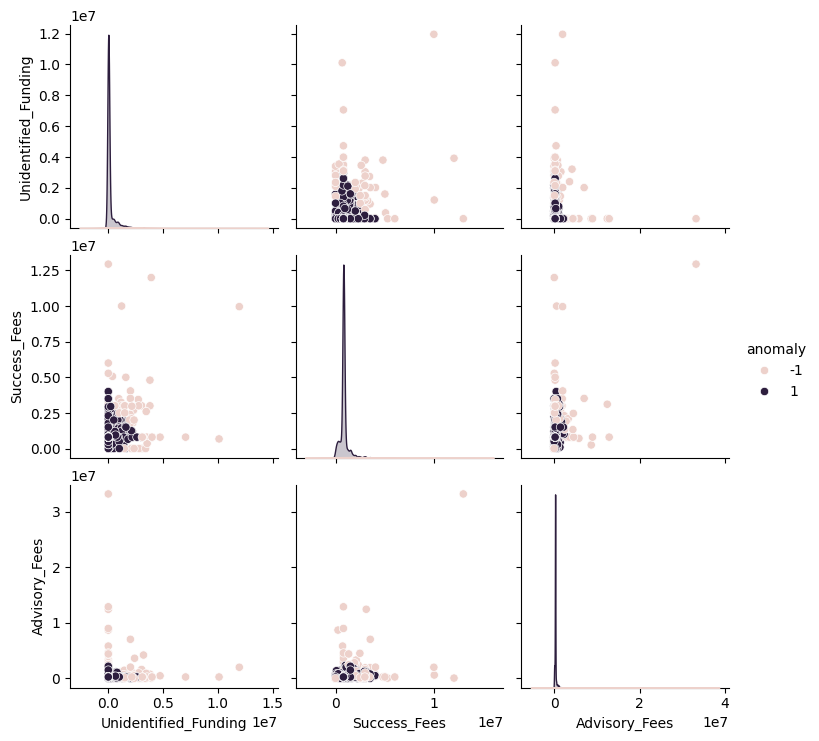

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the 'anomaly' column
sns.pairplot(dataclean, vars=['Unidentified_Funding', 'Success_Fees', 'Advisory_Fees'], hue='anomaly')
plt.show()

Running through ADBench to compare the best performing.


In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=af3930364c1504fe81a4f8369825ecc8cc1c5ea8c0eec514624c2e6b85dd7218
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [ ]:

import pandas as pd
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.lof import LOF
from pyod.models.auto_encoder import AutoEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score


# Select relevant financial columns
financial_columns = ['Unidentified_Funding', 'Success_Fees', 'Advisory_Fees']
X = dataclean[financial_columns]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Define the algorithms to be benchmarked
models = {
    'Isolation Forest': IForest(contamination=0.05),
    'One-Class SVM': OCSVM(contamination=0.05),
    'Local Outlier Factor': LOF(contamination=0.05),
}

results = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_scaled)
    # Predict anomalies
    y_pred = model.labels_

    # Since we may not have ground truth labels, we can't calculate all metrics, but we can still inspect the results
    results[name] = y_pred

# Create a DataFrame to compare the results
comparison_df = pd.DataFrame(results)

comparison_df



,Isolation Forest,One-Class SVM,Local Outlier Factor
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1594,0,0,0
1595,0,0,0
1596,0,0,0
1597,0,0,0


# Week 3


# Explainability:
 Research methods for making Outlier Detection results understandable to an end user. Explore methods for visualizing outlier detection results and explainability.

### Big Question:

Which explainabilty method is easily interpretable/easy to understand?

#### Further Analysis
Compare findings with control dataset.

## Method.

1. Old dataset
2. Engineer it correctly
3. Detect anomalies
4. Explain






### Exploring Prev dataset.

checking class balance


Class Counts:
 Project_Status
DROPPED    725
CLOSED     445
OPEN       335
UNCLEAR     94
Name: count, dtype: int64


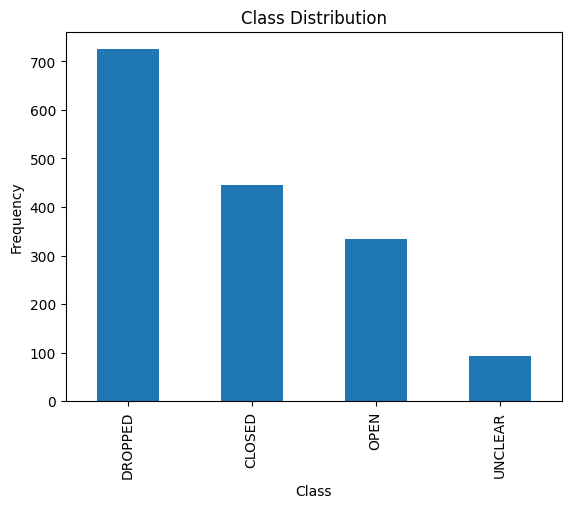

In [ ]:
import pandas as pd

# Assume 'Project Status' is the target class
class_counts = dataclean['Project_Status'].value_counts()

print("Class Counts:\n", class_counts)

# Visualize class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


In [ ]:
dataclean

,Project_ID,Project_Name,Project_Stage,Advisory_Portal_Project_Stage,Project_Status,Project_Type,Project_Classification_Type,Project_Tier,Region_Code,Region_Name,...,Climate_Mitigation_Only_%,Climate_Adaptation_Mitigation,PCR_Include_Y/N,PCR_Due_Date,Expected_FY__of_the_PCR,PCR_Overdue,"PCR,_D/T_Document_status",FY_Completion_Dropped,IFC_Platform,anomaly
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,100.0,15.0,Y,2030-04-02 08:35:37.057797,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform,1
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,100.0,15.0,Y,2032-05-21 08:35:37.059430,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform,1
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,100.0,15.0,Y,2028-10-31 08:35:37.060135,1970-01-01 00:00:00.000002018,N,Complete,2008,Global Health Platform,1
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,UNCLEAR,Implementation (Completion),DROPPED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,100.0,15.0,Y,2032-08-02 08:35:37.060745,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform,1
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,100.0,15.0,Y,2034-07-14 08:35:37.061347,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,609016,West Africa PPP,UNCLEAR,Concept Development,OPEN,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,100.0,15.0,N,2025-08-13 08:36:54.513391,1970-01-01 00:00:00.000002017,N,PCR - Not Started,-1,Global Health Platform,1
1596,609017,Central Africa PPP,UNCLEAR,Concept Development,OPEN,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,100.0,15.0,N,2026-08-28 08:36:54.513965,1970-01-01 00:00:00.000002017,N,PCR - Not Started,-1,Global Health Platform,1
1597,609033,Strengthening PPP Governance Framework in West...,UNCLEAR,Concept Development,OPEN,CLIENT/SECTOR DEVELOPMENT,STANDARD,NaN,EUR,Europe,...,100.0,15.0,N,2029-04-17 08:36:54.514495,1970-01-01 00:00:00.000002017,N,Complete,-1,Global Health Platform,1
1598,609037,Kazakhstan Wind Child 1 with TotalEnergies,UNCLEAR,Concept Development,OPEN,CLIENT/SECTOR DEVELOPMENT,STANDARD,Tier 2,CAT,Central Asia and Turkiye,...,100.0,15.0,N,2027-10-23 08:36:54.515048,1970-01-01 00:00:00.000002016,N,PCR - Not Started,-1,Global Health Platform,1



I would like to fix the imbalance in the dataframe.



In [ ]:
# Identify non-numeric columns
non_numeric_columns = dataclean.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:\n", non_numeric_columns)



Non-Numeric Columns:
 Index(['Project_ID', 'Project_Name', 'Project_Stage',
       'Advisory_Portal_Project_Stage', 'Project_Status', 'Project_Type',
       'Project_Classification_Type', 'Project_Tier', 'Region_Code',
       'Region_Name',
       ...
       'Self_Rating_Rationale', 'Project__Status_Date',
       'Reason_for_Termination/Droppage', 'Climate_Adaptation_Only_%',
       'Climate_Mitigation_Only_%', 'Climate_Adaptation_Mitigation',
       'PCR_Include_Y/N', 'PCR_Overdue', 'PCR,_D/T_Document_status',
       'IFC_Platform'],
      dtype='object', name=0, length=163)


In [ ]:
# One-hot encode non-numeric columns
data_encoded = pd.get_dummies(dataclean, columns=non_numeric_columns)
data_encoded

,Business_Area_Level4_Classification,Client_Cash_Contribution_Funding,Unidentified_Funding,Advisory_Fees,Success_Fees,Climate_Adaptation_%,Climate_Mitigation_%,Special_Green_%,PCR_Due_Date,Expected_FY__of_the_PCR,...,PCR_Overdue_N,PCR_Overdue_Y,"PCR,_D/T_Document_status_Complete","PCR,_D/T_Document_status_In Progress","PCR,_D/T_Document_status_PCR - Not Started","PCR,_D/T_Document_status_PCR Collaboration - In Progress","PCR,_D/T_Document_status_Setup DT - Draft","PCR,_D/T_Document_status_Setup PCR - Draft",IFC_Platform_Global Food Security Platform,IFC_Platform_Global Health Platform
1,NaN,0.0,85222.0,250000.0,750000.0,NaN,NaN,NaN,2030-04-02 08:35:37.057797,1970-01-01 00:00:00.000002019,...,True,False,True,False,False,False,False,False,False,True
2,NaN,0.0,0.0,250000.0,800000.0,NaN,NaN,NaN,2032-05-21 08:35:37.059430,1970-01-01 00:00:00.000002016,...,True,False,True,False,False,False,False,False,False,True
3,NaN,0.0,0.0,250000.0,800000.0,NaN,NaN,NaN,2028-10-31 08:35:37.060135,1970-01-01 00:00:00.000002018,...,True,False,True,False,False,False,False,False,False,True
4,NaN,0.0,2000827.0,250000.0,800000.0,NaN,NaN,NaN,2032-08-02 08:35:37.060745,1970-01-01 00:00:00.000002019,...,True,False,True,False,False,False,False,False,False,True
5,NaN,0.0,0.0,250000.0,800000.0,NaN,NaN,NaN,2034-07-14 08:35:37.061347,1970-01-01 00:00:00.000002016,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,NaN,0.0,0.0,250000.0,800000.0,NaN,NaN,NaN,2025-08-13 08:36:54.513391,1970-01-01 00:00:00.000002017,...,True,False,False,False,True,False,False,False,False,True
1596,NaN,0.0,0.0,250000.0,800000.0,NaN,NaN,NaN,2026-08-28 08:36:54.513965,1970-01-01 00:00:00.000002017,...,True,False,False,False,True,False,False,False,False,True
1597,NaN,0.0,0.0,250000.0,800000.0,NaN,NaN,NaN,2029-04-17 08:36:54.514495,1970-01-01 00:00:00.000002017,...,True,False,True,False,False,False,False,False,False,True
1598,NaN,0.0,0.0,250000.0,800000.0,NaN,NaN,NaN,2027-10-23 08:36:54.515048,1970-01-01 00:00:00.000002016,...,True,False,False,False,True,False,False,False,False,True


In [ ]:

print("Column Names:\n", dataclean.columns)

Column Names:
 Index(['Project_ID', 'Project_Name', 'Project_Stage',
       'Advisory_Portal_Project_Stage', 'Project_Status', 'Project_Type',
       'Project_Classification_Type', 'Project_Tier', 'Region_Code',
       'Region_Name',
       ...
       'Climate_Mitigation_Only_%', 'Climate_Adaptation_Mitigation',
       'PCR_Include_Y/N', 'PCR_Due_Date', 'Expected_FY__of_the_PCR',
       'PCR_Overdue', 'PCR,_D/T_Document_status', 'FY_Completion_Dropped',
       'IFC_Platform', 'anomaly'],
      dtype='object', name=0, length=175)


In [ ]:
dataclean

,Project_ID,Project_Name,Project_Stage,Advisory_Portal_Project_Stage,Project_Status,Project_Type,Project_Classification_Type,Project_Tier,Region_Code,Region_Name,...,Climate_Mitigation_Only_%,Climate_Adaptation_Mitigation,PCR_Include_Y/N,PCR_Due_Date,Expected_FY__of_the_PCR,PCR_Overdue,"PCR,_D/T_Document_status",FY_Completion_Dropped,IFC_Platform,anomaly
1,7157,FAISLABAD AREA ELECTRICITY COMPANY,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,ME,Middle East,...,100.0,15.0,Y,2030-04-02 08:35:37.057797,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform,1
2,10952,Romania Health PSP Advisory,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,100.0,15.0,Y,2032-05-21 08:35:37.059430,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform,1
3,11056,Howard Air Force Base Reconversion,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,LAC,Latin America and the Caribbean,...,100.0,15.0,Y,2028-10-31 08:35:37.060135,1970-01-01 00:00:00.000002018,N,Complete,2008,Global Health Platform,1
4,11176,Belgrade: Municipal Solid Waste Disposal Servi...,UNCLEAR,Implementation (Completion),DROPPED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,EUR,Europe,...,100.0,15.0,Y,2032-08-02 08:35:37.060745,1970-01-01 00:00:00.000002019,N,Complete,2011,Global Health Platform,1
5,11312,Morocco Irrigation,COMPLETED,Post implementation,CLOSED,AS PROJECTS WITH CLIENT(S),STANDARD,No Tier,AFR,Africa,...,100.0,15.0,Y,2034-07-14 08:35:37.061347,1970-01-01 00:00:00.000002016,N,Complete,2006,Global Health Platform,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,609016,West Africa PPP,UNCLEAR,Concept Development,OPEN,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,100.0,15.0,N,2025-08-13 08:36:54.513391,1970-01-01 00:00:00.000002017,N,PCR - Not Started,-1,Global Health Platform,1
1596,609017,Central Africa PPP,UNCLEAR,Concept Development,OPEN,DIAGNOSTIC AND SEED,FAST TRACK,Tier 2,AFR,Africa,...,100.0,15.0,N,2026-08-28 08:36:54.513965,1970-01-01 00:00:00.000002017,N,PCR - Not Started,-1,Global Health Platform,1
1597,609033,Strengthening PPP Governance Framework in West...,UNCLEAR,Concept Development,OPEN,CLIENT/SECTOR DEVELOPMENT,STANDARD,NaN,EUR,Europe,...,100.0,15.0,N,2029-04-17 08:36:54.514495,1970-01-01 00:00:00.000002017,N,Complete,-1,Global Health Platform,1
1598,609037,Kazakhstan Wind Child 1 with TotalEnergies,UNCLEAR,Concept Development,OPEN,CLIENT/SECTOR DEVELOPMENT,STANDARD,Tier 2,CAT,Central Asia and Turkiye,...,100.0,15.0,N,2027-10-23 08:36:54.515048,1970-01-01 00:00:00.000002016,N,PCR - Not Started,-1,Global Health Platform,1


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import shap

# Identify non-numeric columns
non_numeric_columns = dataclean.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:\n", non_numeric_columns)



Non-Numeric Columns:
 Index(['Project_ID', 'Project_Name', 'Project_Stage',
       'Advisory_Portal_Project_Stage', 'Project_Status', 'Project_Type',
       'Project_Classification_Type', 'Project_Tier', 'Region_Code',
       'Region_Name',
       ...
       'Self_Rating_Rationale', 'Project__Status_Date',
       'Reason_for_Termination/Droppage', 'Climate_Adaptation_Only_%',
       'Climate_Mitigation_Only_%', 'Climate_Adaptation_Mitigation',
       'PCR_Include_Y/N', 'PCR_Overdue', 'PCR,_D/T_Document_status',
       'IFC_Platform'],
      dtype='object', name=0, length=163)


In [ ]:
print(data_encoded.columns)

Index(['Business_Area_Level4_Classification',
       'Client_Cash_Contribution_Funding', 'Unidentified_Funding',
       'Advisory_Fees', 'Success_Fees', 'Climate_Adaptation_%',
       'Climate_Mitigation_%', 'Special_Green_%', 'PCR_Due_Date',
       'Expected_FY__of_the_PCR',
       ...
       'PCR_Overdue_N', 'PCR_Overdue_Y', 'PCR,_D/T_Document_status_Complete',
       'PCR,_D/T_Document_status_In Progress',
       'PCR,_D/T_Document_status_PCR - Not Started',
       'PCR,_D/T_Document_status_PCR Collaboration - In Progress',
       'PCR,_D/T_Document_status_Setup DT - Draft',
       'PCR,_D/T_Document_status_Setup PCR - Draft',
       'IFC_Platform_Global Food Security Platform',
       'IFC_Platform_Global Health Platform'],
      dtype='object', length=26422)


In [ ]:
# One-hot encode non-numeric columns
data_encoded = pd.get_dummies(dataclean, columns=non_numeric_columns)
# Ensure the correct column name for the target variable
target_column = 'Project_Status'  # Replace with the actual column name if different

# Separate features and target
X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
resampled_class_counts = pd.Series(y_resampled).value_counts()
print("Resampled Class Counts:\n", resampled_class_counts)




KeyError: "['Project_Status'] not found in axis"

I encountered an error while trying to balance the class distribution over the project status column, But, since this was not the focus of my analysis, i moved on to explanability over financial columns and the anomalies detected in last week's project.

### Financial columns class imbalance

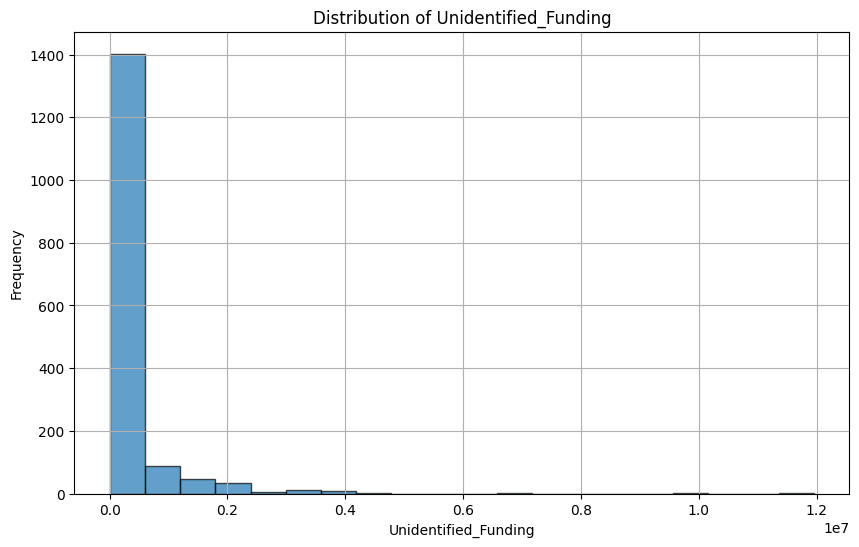

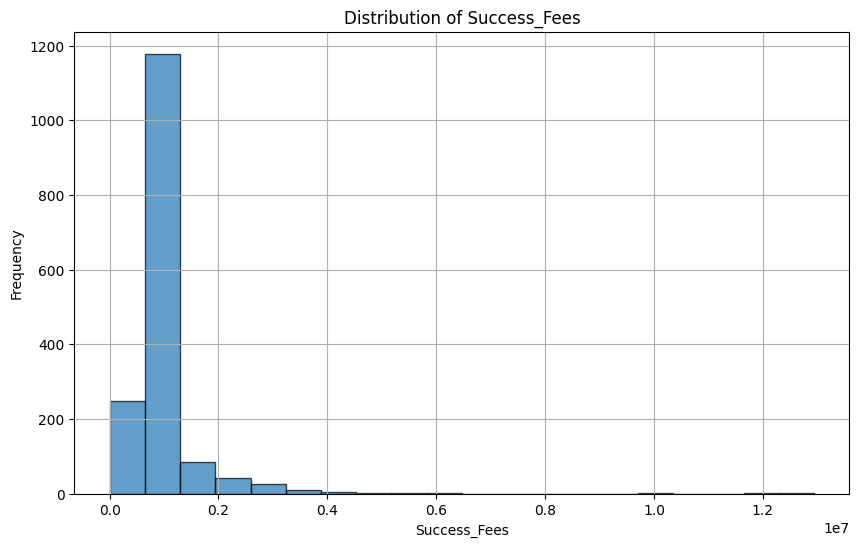

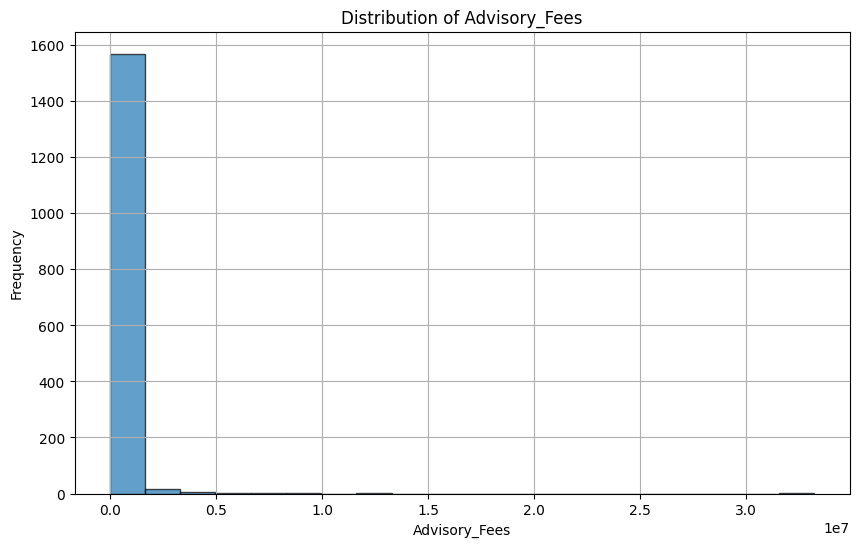

In [ ]:
import matplotlib.pyplot as plt

# Define the columns of interest
financial_columns = ['Unidentified_Funding', 'Success_Fees', 'Advisory_Fees']

# Create histograms for each column
for column in financial_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dataclean[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


### Financial Columns class balance


In [ ]:
# balancing classes in advisory fees and success fees

## Explainability Methods.

### LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=a95e4f51656db9e5c89b3b91edbc37837aa988321e5b567e094482255877a728
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Initialize LIME explainer
explainer_lime = LimeTabularExplainer(X.values, feature_names=columns, class_names=['normal', 'anomaly'], mode='classification')

# Explain the first instance
i = 0  # Index of the instance you want to explain
exp = explainer_lime.explain_instance(X.iloc[i], model.predict_proba)
exp.show_in_notebook(show_all=False)


ModuleNotFoundError: No module named 'lime'

### SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import IsolationForest
import shap

# Train the model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_resampled_scaled)

# Predict anomalies
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['anomaly'] = model.fit_predict(X_resampled_scaled)

# Use SHAP for explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_resampled_scaled)

# Plot SHAP values for an anomaly
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_resampled.iloc[0])

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_resampled_scaled, feature_names=X.columns)


NameError: name 'X_resampled_scaled' is not defined